<a href="https://colab.research.google.com/github/Weedmastercrucifer/Neural-Networks-and-Fuzzy-Logic/blob/main/Assignment1Details/Assignment1_Q11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Assignment 1 Q11

In [ ]:
data=pd.read_excel('/content/drive/MyDrive/Assignment1NNFL/Copy of data_q11.xlsx')
data.describe()

,0.015870,0.030030,0.006193,25.380000,17.330000,184.600000,2019.000000,0.162200,0.665600,0.711900,0.265400,0.460100,0.118900
count,568.000000,568.000000,568.000000,568.00000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,0.011789,0.020526,0.003791,16.25315,25.691919,107.125053,878.578873,0.132316,0.253541,0.271414,0.114341,0.289776,0.083884
std,0.006173,0.008264,0.002646,4.82232,6.141662,33.474687,567.846267,0.022818,0.156523,0.207989,0.065484,0.061508,0.018017
min,0.000000,0.007882,0.000895,7.93000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.007634,0.015128,0.002244,13.01000,21.095000,84.102500,514.975000,0.116600,0.146900,0.114475,0.064730,0.250350,0.071412
50%,0.010920,0.018725,0.003162,14.96500,25.425000,97.655000,685.550000,0.131300,0.211850,0.226550,0.099840,0.282050,0.080015
75%,0.014710,0.023397,0.004526,18.76750,29.757500,125.175000,1073.500000,0.146000,0.337600,0.381400,0.161325,0.317675,0.092065
max,0.052790,0.078950,0.029840,36.04000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
data.columns

Float64Index([ 0.01587,  0.03003, 0.006193,    25.38,    17.33,    184.6,
                2019.0,   0.1622,   0.6656,   0.7119,   0.2654,   0.4601,
                0.1189],
             dtype='float64')

In [ ]:
data

,0.015870,0.030030,0.006193,25.380000,17.330000,184.600000,2019.000000,0.162200,0.665600,0.711900,0.265400,0.460100,0.118900
0,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
2,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
3,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
4,0.01137,0.02165,0.005082,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
564,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
565,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
566,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
dataset=np.array(data)
X=dataset[:,0:14]


In [ ]:
xmin=np.min(X,axis=0)
xmax=np.max(X,axis=0)
X=(X-xmin)/(xmax-xmin)#performing normalization on input features

In [ ]:
X.shape

(568, 13)

In [ ]:
X

array([[0.25383595, 0.08453875, 0.0911101 , ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.38984656, 0.20569032, 0.12700551, ..., 0.83505155, 0.40370589,
        0.21343303],
       [0.35366547, 0.72814769, 0.28720479, ..., 0.88487973, 1.        ,
        0.77371114],
       ...,
       [0.29494222, 0.07454832, 0.10354739, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.31521121, 0.21610289, 0.18276605, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.        , 0.26563291, 0.06523361, ..., 0.        , 0.25744136,
        0.10068215]])

In [ ]:
m=X.shape[0] #number of training sample
n=X.shape[1] #number of features
iters=1500

In [ ]:
K=20

In [ ]:
Centroids=np.array([]).reshape(n,0)

In [ ]:
for i in range(K):
  rand=np.random.randint(0,m-1)
  Centroids=np.c_[Centroids,X[rand]]

In [ ]:
Centroids.shape

(13, 20)

In [ ]:
output={}

In [ ]:
for i in range(iters):
  #computing euclidean distance for each training example from centroid and assigning cluster based on minimum distance
  EDistance=np.array([]).reshape(m,0)
  for k in range(K):
    temp=np.sqrt(np.sum((X-Centroids[:,k])**2,axis=1))
    EDistance=np.c_[EDistance,temp]
  C=np.argmin(EDistance,axis=1)+1 #finding minimum distance and storing index of column
  #regroup data points based on cluster C and calculating mean for centroid
  Y={}
  for k in range(K):
    Y[k+1]=np.array([]).reshape(n,0)
  for i in range(m):
    Y[C[i]]=np.c_[Y[C[i]],X[i]]

  for k in range(K):
    Y[k+1]=Y[k+1].T

  for k in range(K):
    Centroids[:,k]=np.mean(Y[k+1],axis=0)
  output=Y      




In [ ]:
Centroids.shape

(13, 20)

In [ ]:
Centroids

array([[0.21584344, 0.11054391, 0.16884052, 0.36559955, 0.33993353,
        0.26396692, 0.21075547, 0.29761071, 0.31243584, 0.25106356,
        0.15256299, 0.35061655, 0.17066364, 0.21276568, 0.22188137,
        0.15627156, 0.12055849, 0.16606175, 0.61200985, 0.21396015],
       [0.07769671, 0.16067664, 0.10160819, 0.28051068, 0.23891714,
        0.14279936, 0.17915764, 0.2694792 , 0.16040906, 0.11636198,
        0.13846406, 0.23077026, 0.28174424, 0.12980948, 0.11725804,
        0.16399317, 0.20181773, 0.36131029, 0.35716497, 0.14580891],
       [0.05171669, 0.05421535, 0.04560069, 0.1521634 , 0.10312182,
        0.12954118, 0.13171161, 0.16964982, 0.11045195, 0.07859702,
        0.04839364, 0.22238279, 0.07447522, 0.07344914, 0.06584125,
        0.08348231, 0.0545772 , 0.10760195, 0.48130605, 0.11253439],
       [0.63433831, 0.19405446, 0.27748132, 0.71286612, 0.50886129,
        0.32842736, 0.16756826, 0.34091225, 0.61458903, 0.47304943,
        0.20172051, 0.17480138, 0.29322305, 0

In [ ]:
output


{1: array([[0.19662815, 0.0414814 , 0.03773337, 0.75560299, 0.62819829,
         0.68524329, 0.59717853, 0.45519382, 0.22577641, 0.25199681,
         0.69037801, 0.24778238, 0.13262495],
        [0.20420534, 0.07651826, 0.0470268 , 0.71042334, 0.88992537,
         0.64639673, 0.5632619 , 0.45981642, 0.3710161 , 0.31908946,
         0.55841924, 0.22629608, 0.13537977],
        [0.20666793, 0.07173411, 0.06882661, 0.5884027 , 0.67590618,
         0.559241  , 0.41456941, 0.33764776, 0.24139671, 0.33115016,
         0.5371134 , 0.1718904 , 0.18522891],
        [0.26027657, 0.06160297, 0.06440446, 0.51867663, 0.87553305,
         0.45216395, 0.30053087, 0.43142046, 0.33589467, 0.25886581,
         0.70996564, 0.25389316, 0.1962482 ],
        [0.1550483 , 0.06948275, 0.03445131, 0.58342227, 0.72334755,
         0.55724887, 0.40768777, 0.53509873, 0.25924848, 0.30255591,
         0.58316151, 0.31263552, 0.16364948],
        [0.17579087, 0.08144312, 0.04851236, 0.87371042, 0.93656716,
        

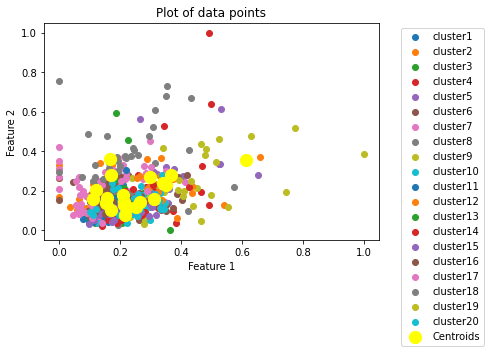

In [ ]:
#color=['red','blue','green','cyan','magenta','gray','violet','pink','brown','olive','maroon','darkred']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5','cluster6','cluster7','cluster8','cluster9','cluster10','cluster11','cluster12','cluster13','cluster14','cluster15','cluster16','cluster17','cluster18','cluster19','cluster20']
for k in range(K):
    plt.scatter(output[k+1][:,0],output[k+1][:,1],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=150,c='yellow',label='Centroids') 
plt.xlabel('Feature 1')
plt.ylabel('Feature 2') 
plt.title('Plot of data points')

plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

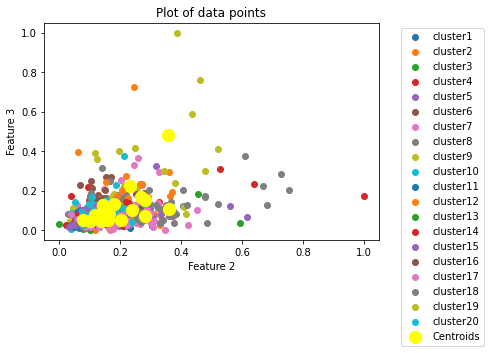

In [ ]:
labels=['cluster1','cluster2','cluster3','cluster4','cluster5','cluster6','cluster7','cluster8','cluster9','cluster10','cluster11','cluster12','cluster13','cluster14','cluster15','cluster16','cluster17','cluster18','cluster19','cluster20']
for k in range(K):
    plt.scatter(output[k+1][:,1],output[k+1][:,2],label=labels[k])
plt.scatter(Centroids[1,:],Centroids[2,:],s=150,c='yellow',label='Centroids')
plt.xlabel('Feature 2')
plt.ylabel('Feature 3') 
plt.title('Plot of data points')
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

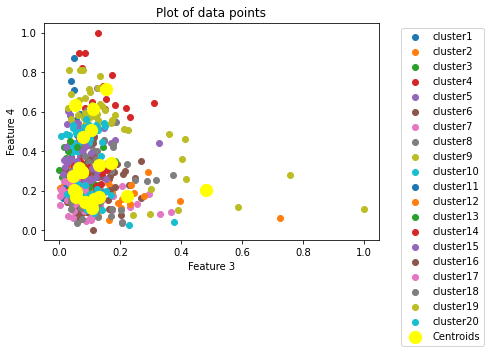

In [ ]:
labels=['cluster1','cluster2','cluster3','cluster4','cluster5','cluster6','cluster7','cluster8','cluster9','cluster10','cluster11','cluster12','cluster13','cluster14','cluster15','cluster16','cluster17','cluster18','cluster19','cluster20']
for k in range(K):
    plt.scatter(output[k+1][:,2],output[k+1][:,3],label=labels[k])
plt.scatter(Centroids[2,:],Centroids[3,:],s=150,c='yellow',label='Centroids')
plt.xlabel('Feature 3')
plt.ylabel('Feature 4') 
plt.title('Plot of data points')
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

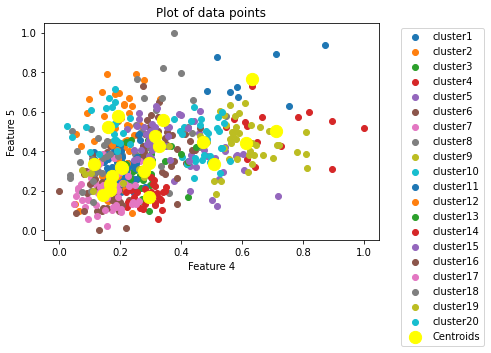

In [ ]:
labels=['cluster1','cluster2','cluster3','cluster4','cluster5','cluster6','cluster7','cluster8','cluster9','cluster10','cluster11','cluster12','cluster13','cluster14','cluster15','cluster16','cluster17','cluster18','cluster19','cluster20']
for k in range(K):
    plt.scatter(output[k+1][:,3],output[k+1][:,4],label=labels[k])
plt.scatter(Centroids[3,:],Centroids[4,:],s=150,c='yellow',label='Centroids')
plt.xlabel('Feature 4')
plt.ylabel('Feature 5') 
plt.title('Plot of data points')
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

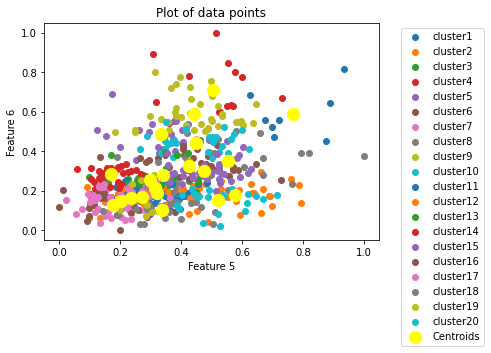

In [ ]:
labels=['cluster1','cluster2','cluster3','cluster4','cluster5','cluster6','cluster7','cluster8','cluster9','cluster10','cluster11','cluster12','cluster13','cluster14','cluster15','cluster16','cluster17','cluster18','cluster19','cluster20']
for k in range(K):
    plt.scatter(output[k+1][:,4],output[k+1][:,5],label=labels[k])
plt.scatter(Centroids[4,:],Centroids[5,:],s=150,c='yellow',label='Centroids')
plt.xlabel('Feature 5')
plt.ylabel('Feature 6') 
plt.title('Plot of data points')
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

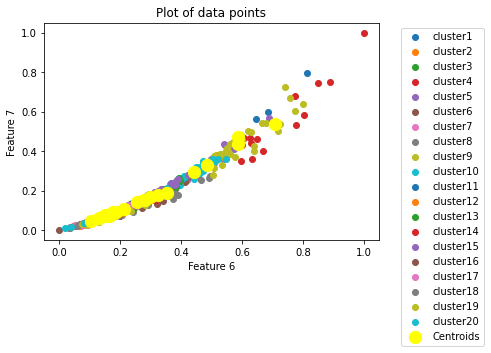

In [ ]:
labels=['cluster1','cluster2','cluster3','cluster4','cluster5','cluster6','cluster7','cluster8','cluster9','cluster10','cluster11','cluster12','cluster13','cluster14','cluster15','cluster16','cluster17','cluster18','cluster19','cluster20']
for k in range(K):
    plt.scatter(output[k+1][:,5],output[k+1][:,6],label=labels[k])
plt.scatter(Centroids[5,:],Centroids[6,:],s=150,c='yellow',label='Centroids')
plt.xlabel('Feature 6')
plt.ylabel('Feature 7') 
plt.title('Plot of data points')
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

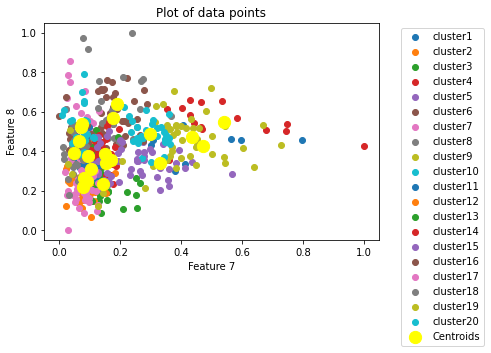

In [ ]:
labels=['cluster1','cluster2','cluster3','cluster4','cluster5','cluster6','cluster7','cluster8','cluster9','cluster10','cluster11','cluster12','cluster13','cluster14','cluster15','cluster16','cluster17','cluster18','cluster19','cluster20']
for k in range(K):
    plt.scatter(output[k+1][:,6],output[k+1][:,7],label=labels[k])
plt.scatter(Centroids[6,:],Centroids[7,:],s=150,c='yellow',label='Centroids')
plt.xlabel('Feature 7')
plt.ylabel('Feature 8') 
plt.title('Plot of data points')
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

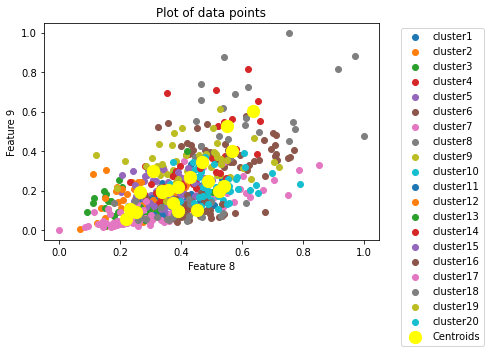

In [ ]:
labels=['cluster1','cluster2','cluster3','cluster4','cluster5','cluster6','cluster7','cluster8','cluster9','cluster10','cluster11','cluster12','cluster13','cluster14','cluster15','cluster16','cluster17','cluster18','cluster19','cluster20']
for k in range(K):
    plt.scatter(output[k+1][:,7],output[k+1][:,8],label=labels[k])
plt.scatter(Centroids[7,:],Centroids[8,:],s=150,c='yellow',label='Centroids')
plt.xlabel('Feature 8')
plt.ylabel('Feature 9') 
plt.title('Plot of data points')
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

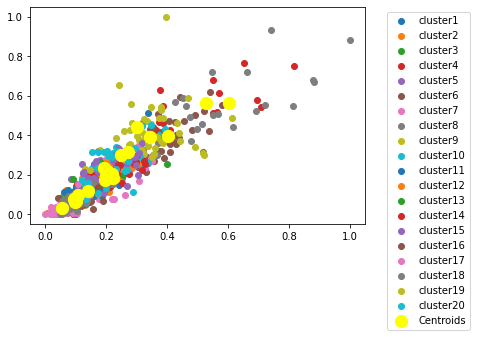

In [ ]:
labels=['cluster1','cluster2','cluster3','cluster4','cluster5','cluster6','cluster7','cluster8','cluster9','cluster10','cluster11','cluster12','cluster13','cluster14','cluster15','cluster16','cluster17','cluster18','cluster19','cluster20']
for k in range(K):
    plt.scatter(output[k+1][:,8],output[k+1][:,9],label=labels[k])
plt.scatter(Centroids[8,:],Centroids[9,:],s=150,c='yellow',label='Centroids')
plt.xlabel('Feature 9')
plt.ylabel('Feature 10') 
plt.title('Plot of data points')
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

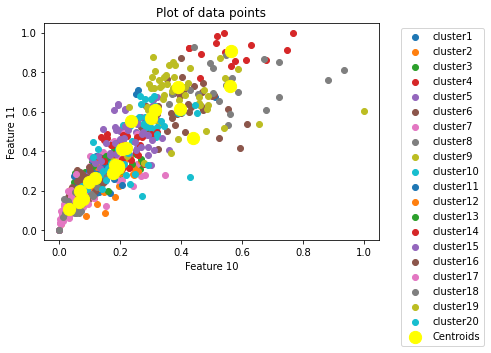

In [ ]:
labels=['cluster1','cluster2','cluster3','cluster4','cluster5','cluster6','cluster7','cluster8','cluster9','cluster10','cluster11','cluster12','cluster13','cluster14','cluster15','cluster16','cluster17','cluster18','cluster19','cluster20']
for k in range(K):
    plt.scatter(output[k+1][:,9],output[k+1][:,10],label=labels[k])
plt.scatter(Centroids[9,:],Centroids[10,:],s=150,c='yellow',label='Centroids')
plt.xlabel('Feature 10')
plt.ylabel('Feature 11') 
plt.title('Plot of data points')
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

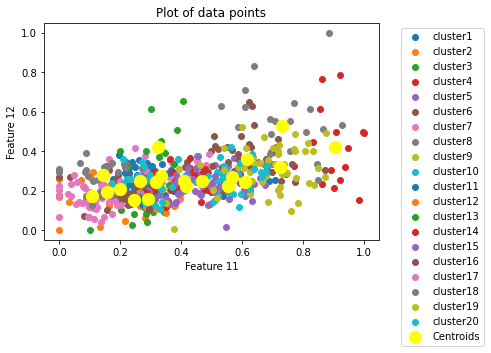

In [ ]:
labels=['cluster1','cluster2','cluster3','cluster4','cluster5','cluster6','cluster7','cluster8','cluster9','cluster10','cluster11','cluster12','cluster13','cluster14','cluster15','cluster16','cluster17','cluster18','cluster19','cluster20']
for k in range(K):
    plt.scatter(output[k+1][:,10],output[k+1][:,11],label=labels[k])
plt.scatter(Centroids[10,:],Centroids[11,:],s=150,c='yellow',label='Centroids')
plt.xlabel('Feature 11')
plt.ylabel('Feature 12') 
plt.title('Plot of data points')
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

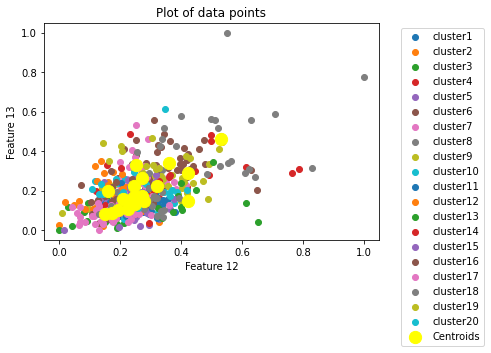

In [ ]:
labels=['cluster1','cluster2','cluster3','cluster4','cluster5','cluster6','cluster7','cluster8','cluster9','cluster10','cluster11','cluster12','cluster13','cluster14','cluster15','cluster16','cluster17','cluster18','cluster19','cluster20']
for k in range(K):
    plt.scatter(output[k+1][:,11],output[k+1][:,12],label=labels[k])
plt.scatter(Centroids[11,:],Centroids[12,:],s=150,c='yellow',label='Centroids')
plt.xlabel('Feature 12')
plt.ylabel('Feature 13') 
plt.title('Plot of data points')
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

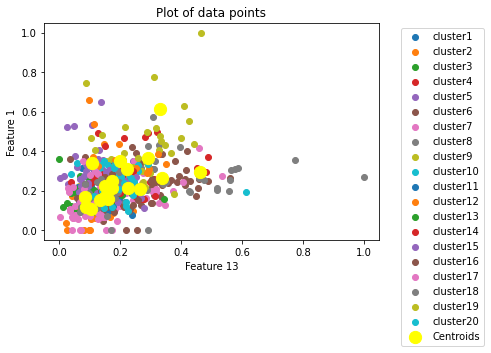

In [ ]:
labels=['cluster1','cluster2','cluster3','cluster4','cluster5','cluster6','cluster7','cluster8','cluster9','cluster10','cluster11','cluster12','cluster13','cluster14','cluster15','cluster16','cluster17','cluster18','cluster19','cluster20']
for k in range(K):
    plt.scatter(output[k+1][:,12],output[k+1][:,0],label=labels[k])
plt.scatter(Centroids[12,:],Centroids[0,:],s=150,c='yellow',label='Centroids')
plt.xlabel('Feature 13')
plt.ylabel('Feature 1') 
plt.title('Plot of data points')
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

In [ ]:
Centroids[0].shape

(20,)